# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['tsihombe',
 'pisco',
 'grand river south east',
 'saldanha',
 'kapaa',
 'port elizabeth',
 'atuona',
 'pevek',
 'saint george',
 'vestmannaeyjar',
 'taolanaro',
 'ushuaia',
 'kusk',
 'rikitea',
 'new richmond',
 'gobabis',
 'thompson',
 'airai',
 'norman wells',
 'avarua',
 'barentsburg',
 'kavaratti',
 'verkhnevilyuysk',
 'punta arenas',
 'faanui',
 'sisimiut',
 'zapotiltic',
 'tasiilaq',
 'east london',
 'santiago del estero',
 'bluff',
 'jawhar',
 'aksehir',
 'muli',
 'carnarvon',
 'husavik',
 'marawi',
 'chulumani',
 'kamenskoye',
 'kaduqli',
 'albany',
 'matagami',
 'port blair',
 'busselton',
 'arraial do cabo',
 'mataura',
 'bambous virieux',
 'attawapiskat',
 'chumikan',
 'hilo',
 'jamestown',
 'inirida',
 'makat',
 'hobart',
 'saskylakh',
 'kaitangata',
 'tocopilla',
 'nata',
 'russkaya polyana',
 'hambantota',
 'bubaque',
 'port hardy',
 'puerto ayora',
 'ancud',
 'zelenogorskiy',
 'esperance',
 'pangnirtung',
 'cabo san lucas',
 'grindavik',
 'adrar',
 'yellowknife',
 'por

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
### Perform API Calls
#Create url for API calls with imperial units
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'
query_url = f"{url}appid={weather_api_key}&units={units}&q="
#Create lists to store data from calls for each city
updated_cities = []
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
city_number = 1
#Run for loop through cities and place data into the above lists.
#After each successful API call print what city the call was for. If city isn't found print that it was not found.
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        temperature.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        updated_cities.append(city)
        print(f'Processing Record {city_number} of Set 1 | {city}')
        city_number = city_number + 1
    except:
        print(f'{city} not found. Skipping...')
    

tsihombe not found. Skipping...
Processing Record 1 of Set 1 | pisco
grand river south east not found. Skipping...
Processing Record 2 of Set 1 | saldanha
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | pevek
Processing Record 7 of Set 1 | saint george
Processing Record 8 of Set 1 | vestmannaeyjar
taolanaro not found. Skipping...
Processing Record 9 of Set 1 | ushuaia
kusk not found. Skipping...
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | new richmond
Processing Record 12 of Set 1 | gobabis
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | airai
Processing Record 15 of Set 1 | norman wells
Processing Record 16 of Set 1 | avarua
barentsburg not found. Skipping...
Processing Record 17 of Set 1 | kavaratti
Processing Record 18 of Set 1 | verkhnevilyuysk
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | faanui


Processing Record 182 of Set 1 | kangaatsiaq
Processing Record 183 of Set 1 | leningradskiy
Processing Record 184 of Set 1 | guarapari
Processing Record 185 of Set 1 | bethel
Processing Record 186 of Set 1 | molchanovo
Processing Record 187 of Set 1 | yuxia
Processing Record 188 of Set 1 | vila franca do campo
Processing Record 189 of Set 1 | evensk
Processing Record 190 of Set 1 | eureka
Processing Record 191 of Set 1 | acapulco
Processing Record 192 of Set 1 | birin
Processing Record 193 of Set 1 | tianpeng
Processing Record 194 of Set 1 | ciudad bolivar
Processing Record 195 of Set 1 | chifeng
Processing Record 196 of Set 1 | lukovetskiy
Processing Record 197 of Set 1 | ribeira grande
Processing Record 198 of Set 1 | hithadhoo
Processing Record 199 of Set 1 | barao de melgaco
Processing Record 200 of Set 1 | tanda
Processing Record 201 of Set 1 | rundu
Processing Record 202 of Set 1 | dingle
Processing Record 203 of Set 1 | fairbanks
Processing Record 204 of Set 1 | constantine
Proc

Processing Record 367 of Set 1 | lazarev
Processing Record 368 of Set 1 | jinxiang
Processing Record 369 of Set 1 | sao miguel do araguaia
Processing Record 370 of Set 1 | la rioja
Processing Record 371 of Set 1 | kundiawa
Processing Record 372 of Set 1 | salinopolis
Processing Record 373 of Set 1 | lavrentiya
Processing Record 374 of Set 1 | nuuk
Processing Record 375 of Set 1 | bulgan
Processing Record 376 of Set 1 | innisfail
Processing Record 377 of Set 1 | sioux lookout
Processing Record 378 of Set 1 | stupino
Processing Record 379 of Set 1 | hede
Processing Record 380 of Set 1 | krasnoselkup
Processing Record 381 of Set 1 | bambanglipuro
Processing Record 382 of Set 1 | dhidhdhoo
Processing Record 383 of Set 1 | caravelas
Processing Record 384 of Set 1 | virden
Processing Record 385 of Set 1 | vangaindrano
Processing Record 386 of Set 1 | padang
Processing Record 387 of Set 1 | gizo
umzimvubu not found. Skipping...
Processing Record 388 of Set 1 | conceicao do araguaia
Processing

Processing Record 548 of Set 1 | arrifes


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
#Create dictionary of lists
weather_dictionary = {'City' : updated_cities,
                'Lat'  : latitude,
                'Lng'  : longitude, 
                'Max Temp' : temperature,
                'Humidity' : humidity,
                'Cloudiness' : cloudiness,
                'Wind Speed' : wind_speed,
                'Country'    : country,
                'Date'       : date}
#Create data frame
weather_df = pd.DataFrame(weather_dictionary)
#Save data frame to CSV
weather_df.to_csv(output_data_file)

In [10]:
#Import saved CSV file and create data frame tied to CSV instead of above Kernals.
weather_data_path = "../output_data/cities.csv"
weather_data = pd.read_csv(weather_data_path)
weather_df = pd.DataFrame(weather_data)
#Drop prior index column
weather_df.drop(['Unnamed: 0'], inplace= True, axis = 1)
#Display data frame preview
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pisco,-13.7000,-76.2167,75.20,64,0,8.05,PE,1611771279
1,saldanha,-33.0117,17.9442,66.20,59,0,20.71,ZA,1611771280
2,kapaa,22.0752,-159.3190,73.40,88,90,13.80,US,1611770983
3,port elizabeth,-33.9180,25.5701,66.20,94,75,6.91,ZA,1611771280
4,atuona,-9.8000,-139.0333,78.13,77,4,15.35,PF,1611771280


In [11]:
#Check data frame statistics. Note max humidity is 100%. next step is skipped.
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,5.480000e+02
mean,20.173473,19.538322,49.208230,71.571168,54.461679,8.862628,1.611771e+09
std,33.598903,90.402089,34.920707,20.049857,38.486166,6.349564,1.073896e+02
min,-54.800000,-179.166700,-51.200000,5.000000,0.000000,0.290000,1.611771e+09
25%,-8.141700,-60.022600,28.000000,62.000000,19.000000,3.932500,1.611771e+09
50%,25.912350,23.274900,60.330000,77.000000,64.000000,7.655000,1.611771e+09
75%,48.166675,102.665875,77.022500,87.000000,90.000000,12.660000,1.611771e+09
max,78.218600,179.316700,99.000000,100.000000,100.000000,37.980000,1.611771e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#skipped

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

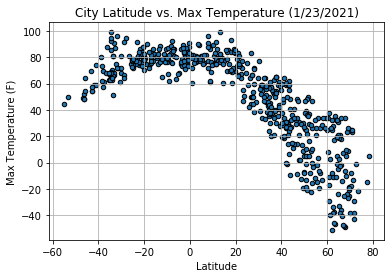

In [13]:
#Create plot and format
latitude_temperature_plot=weather_df.plot(kind='scatter', x = 'Lat', y='Max Temp', grid=True, edgecolors = 'black')
#Add title and labels
latitude_temperature_plot.set_xlabel('Latitude')
latitude_temperature_plot.set_ylabel('Max Temperature (F)')
latitude_temperature_plot.set_title('City Latitude vs. Max Temperature (1/23/2021)')
#Save plot
latitude_temperature_plot.figure.savefig('../output_data/Fig1.png')
#Show plot
latitude_temperature_plot
#Below plot shows that the southern hemisphere currently has a higher max temperature than the northern hemisphere. 

## Latitude vs. Humidity Plot

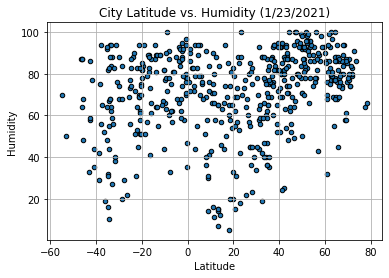

In [14]:
#Create plot and format
latitude_humidity_plot=weather_df.plot(kind='scatter', x = 'Lat', y='Humidity', grid=True, edgecolors = 'black')
#Add title and labels
latitude_humidity_plot.set_xlabel('Latitude')
latitude_humidity_plot.set_ylabel('Humidity')
latitude_humidity_plot.set_title('City Latitude vs. Humidity (1/23/2021)')
#Save plot
latitude_humidity_plot.figure.savefig('../output_data/Fig2.png')
#Show plot
latitude_humidity_plot
#Below plot does not show a clear correlation between latitude and humidity. 

## Latitude vs. Cloudiness Plot

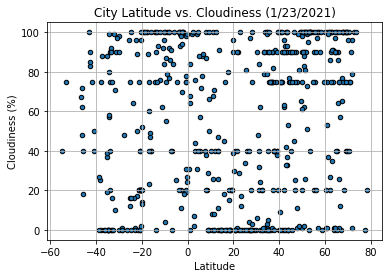

In [18]:
#Create plot and format
latitude_cloudiness_plot=weather_df.plot(kind='scatter', x = 'Lat', y='Cloudiness', grid=True, edgecolors = 'black')
#Add title and labels
latitude_cloudiness_plot.set_xlabel('Latitude')
latitude_cloudiness_plot.set_ylabel('Cloudiness (%)')
latitude_cloudiness_plot.set_title('City Latitude vs. Cloudiness (1/23/2021)')
#Save plot
latitude_cloudiness_plot.figure.savefig('../output_data/Fig3.png')
#Show plot
latitude_cloudiness_plot
#Below plot does not show a clear correlation between latitude and cloudiness. 

## Latitude vs. Wind Speed Plot

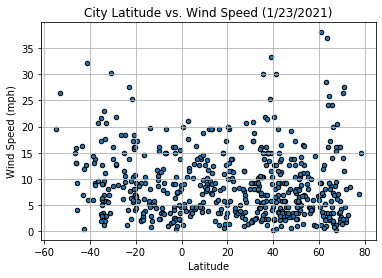

In [19]:
#Create plot and format
latitude_windspeed_plot=weather_df.plot(kind='scatter', x = 'Lat', y='Wind Speed', grid=True, edgecolors = 'black')
#Add title and labels
latitude_windspeed_plot.set_xlabel('Latitude')
latitude_windspeed_plot.set_ylabel('Wind Speed (mph)')
latitude_windspeed_plot.set_title('City Latitude vs. Wind Speed (1/23/2021)')
#Save plot
latitude_windspeed_plot.figure.savefig('../output_data/Fig4.png')
#Show plot
latitude_windspeed_plot
#Below plot does not show a clear correlation between latitude and wind speed. 

## Linear Regression

In [20]:
#Create filter for northern hemisphere
northern_filter = weather_df.loc[:,'Lat']>=0
#Create data frame for northern hemisphere
northern_weather_df = weather_df.loc[northern_filter,:]
#Preview data frame
northern_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,kapaa,22.0752,-159.3190,73.40,88,90,13.80,US,1611770983
5,pevek,69.7008,170.3133,-25.19,86,100,2.80,RU,1611770996
6,saint george,37.1041,-113.5841,39.99,60,90,16.11,US,1611771281
7,vestmannaeyjar,63.4427,-20.2734,35.60,69,75,36.82,IS,1611771152
10,new richmond,45.1230,-92.5366,10.99,52,40,3.44,US,1611771100


In [21]:
#Create filter for southern hemisphere
southern_filter = weather_df.loc[:,'Lat']<0
#Create data frame for southern hemisphere
southern_weather_df = weather_df.loc[southern_filter,:]
#Preview data frame
southern_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pisco,-13.7000,-76.2167,75.20,64,0,8.05,PE,1611771279
1,saldanha,-33.0117,17.9442,66.20,59,0,20.71,ZA,1611771280
3,port elizabeth,-33.9180,25.5701,66.20,94,75,6.91,ZA,1611771280
4,atuona,-9.8000,-139.0333,78.13,77,4,15.35,PF,1611771280
8,ushuaia,-54.8000,-68.3000,44.60,70,40,19.57,AR,1611770920


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7308251984983373


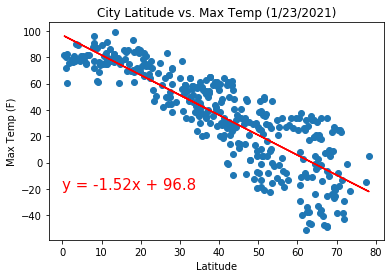

In [25]:
#Find latitude
northern_latitude = northern_weather_df['Lat']
#Find max temp
northern_max_temp = northern_weather_df['Max Temp']
#Set up values and calculate linear regression line for plot
x_values = northern_latitude
y_values = northern_max_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Create scatter plot
plt.scatter(x_values,y_values)
# Plot linear regresion line
plt.plot(x_values,regress_values,"r-")
# Add equation and labels
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('City Latitude vs. Max Temp (1/23/2021)')
#Save plot
plt.savefig('../output_data/Fig5.png')
# Print r-squared value
print(f"The r-squared is: {rvalue**2}")
plt.show()

#Below plot shows that max temperature decreases further away from the equator. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.28540331760694765


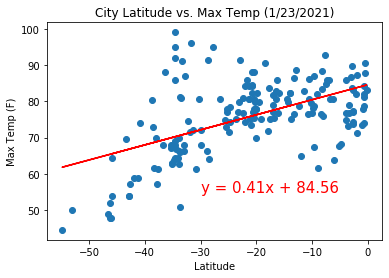

In [26]:
#Find latitude
southern_latitude = southern_weather_df['Lat']
#Find max temp
southern_max_temp = southern_weather_df['Max Temp']
#Set up values and calculate linear regression line for plot
x_values = southern_latitude
y_values = southern_max_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Create scatter plot
plt.scatter(x_values,y_values)
# Plot linear regresion line
plt.plot(x_values,regress_values,"r-")
# Add equation and labels
plt.annotate(line_eq,(-30,55),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('City Latitude vs. Max Temp (1/23/2021)')
#Save plot
plt.savefig('../output_data/Fig6.png')
# Print r-squared value
print(f"The r-squared is: {rvalue**2}")
plt.show()
#Below plot shows slight trend in max temperature increasing closer to the equator. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1407414879931134


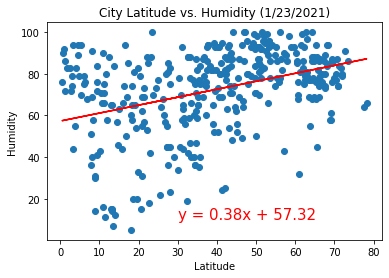

In [29]:
#Find latitude
northern_latitude = northern_weather_df['Lat']
#Find max temp
northern_humidity = northern_weather_df['Humidity']
#Set up values and calculate linear regression line for plot
x_values = northern_latitude
y_values = northern_humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Create scatter plot
plt.scatter(x_values,y_values)
# Plot linear regresion line
plt.plot(x_values,regress_values,"r-")
# Add equation and labels
plt.annotate(line_eq,(30,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity (1/23/2021)')
#Save plot
plt.savefig('../output_data/Fig7.png')
# Print r-squared value
print(f"The r-squared is: {rvalue**2}")
plt.show()
#Below plot shows a slight trend in increasing humidity further from the equator. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08004159353747221


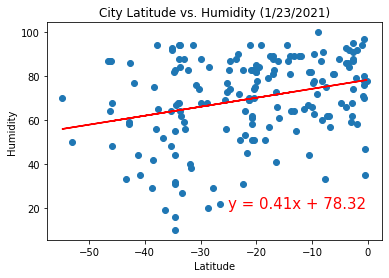

In [32]:
#Find latitude
southern_latitude = southern_weather_df['Lat']
#Find max temp
southern_humidity = southern_weather_df['Humidity']
#Set up values and calculate linear regression line for plot
x_values = southern_latitude
y_values = southern_humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Create scatter plot
plt.scatter(x_values,y_values)
# Plot linear regresion line
plt.plot(x_values,regress_values,"r-")
# Add equation and labels
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity (1/23/2021)')
#Save plot
plt.savefig('../output_data/Fig8.png')
# Print r-squared value
print(f"The r-squared is: {rvalue**2}")
plt.show()
#Below plot shows slight trend in humidity increasing closer to the equator. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08963606153909229


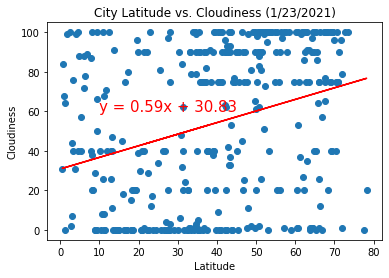

In [34]:
#Find latitude
northern_latitude = northern_weather_df['Lat']
#Find max temp
northern_cloudiness = northern_weather_df['Cloudiness']
#Set up values and calculate linear regression line for plot
x_values = northern_latitude
y_values = northern_cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Create scatter plot
plt.scatter(x_values,y_values)
# Plot linear regresion line
plt.plot(x_values,regress_values,"r-")
# Add equation and labels
plt.annotate(line_eq,(10,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness (1/23/2021)')
#Save plot
plt.savefig('../output_data/Fig9.png')
# Print r-squared value
print(f"The r-squared is: {rvalue**2}")
plt.show()
#Below plot does not show a slight trend between increased cloudiness further from the equator. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0574477313705803


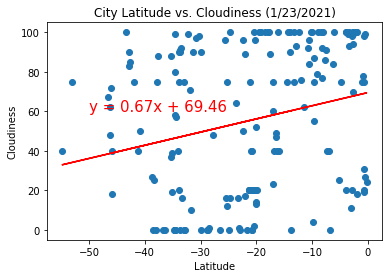

In [36]:
#Find latitude
southern_latitude = southern_weather_df['Lat']
#Find max temp
southern_cloudiness = southern_weather_df['Cloudiness']
#Set up values and calculate linear regression line for plot
x_values = southern_latitude
y_values = southern_cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Create scatter plot
plt.scatter(x_values,y_values)
# Plot linear regresion line
plt.plot(x_values,regress_values,"r-")
# Add equation and labels
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness (1/23/2021)')
#Save plot
plt.savefig('../output_data/Fig10.png')
# Print r-squared value
print(f"The r-squared is: {rvalue**2}")
plt.show()
#Below plot shows slight trend in cloudiness increasing closer to the equator. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0016426078455350124


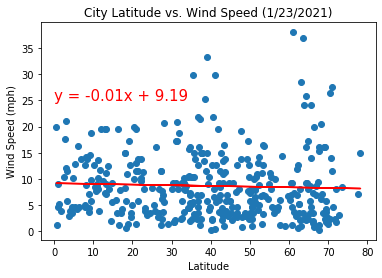

In [38]:
#Find latitude
northern_latitude = northern_weather_df['Lat']
#Find max temp
northern_windspeed = northern_weather_df['Wind Speed']
#Set up values and calculate linear regression line for plot
x_values = northern_latitude
y_values = northern_windspeed
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Create scatter plot
plt.scatter(x_values,y_values)
# Plot linear regresion line
plt.plot(x_values,regress_values,"r-")
# Add equation and labels
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (1/23/2021)')
#Save plot
plt.savefig('../output_data/Fig11.png')
# Print r-squared value
print(f"The r-squared is: {rvalue**2}")
plt.show()
#Below plot does not show a clear trend between latitude and wind speed. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07852861579262743


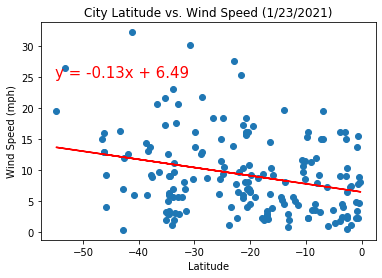

In [41]:
#Find latitude
southern_latitude = southern_weather_df['Lat']
#Find max temp
southern_windspeed = southern_weather_df['Wind Speed']
#Set up values and calculate linear regression line for plot
x_values = southern_latitude
y_values = southern_windspeed
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Create scatter plot
plt.scatter(x_values,y_values)
# Plot linear regresion line
plt.plot(x_values,regress_values,"r-")
# Add equation and labels
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (1/23/2021)')
#Save plot
plt.savefig('../output_data/Fig12.png')
# Print r-squared value
print(f"The r-squared is: {rvalue**2}")
plt.show()
#Below plot shows slight trend in wind speed decreasing closer to the equator. 

In [ ]:
#Observable Trends
#Max temperature is currently higher in the southern hemisphere. This is shown in the overall City Latitude vs. Max Temp plot.
#In the northern hemisphere the max temperature is lower further from the equator. This is shown in the northern hemisphere City Latitude vs. Max Temp plot.
#There does not appear to be a clear trend for latitude vs. wind speed in the northern hemisphere. This is shown in the northern hemisphere City Latitude vs. Wind Speed plot.